In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset link: https://www.kaggle.com/datasets/rahuldogra/top5000youtubechannels 

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Python\Project\YouTube Channels\top-5000-youtube-channels.csv') #Importing data
df.head() #showing top 5 rows

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [3]:
df.shape #checking shape of the data

(5000, 6)

In [4]:
df.duplicated().sum() #checking duplocates

np.int64(0)

In [5]:
df.isnull().sum() #Checking null values

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

In [6]:
df.dtypes #checking data types of each columns

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers      object
Video views       int64
dtype: object

### Columns name "Video Uploads" & "Subscribers" data types are object but they should be integer

In [7]:
#df['Video Uploads'] = df['Video Uploads'].replace('--',np.nan)
#df['Video Uploads'] = df['Video Uploads'].astype('float')
#df['Subscribers'] = df['Subscribers'].replace('-- ',np.nan)
#df['Subscribers'] = df['Subscribers'].astype('float')
df['Video Uploads'] = pd.to_numeric(df['Video Uploads'], errors='coerce') #converting string to numeric
df['Subscribers'] = pd.to_numeric(df['Subscribers'], errors='coerce') #converting string numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           5000 non-null   object 
 1   Grade          5000 non-null   object 
 2   Channel name   5000 non-null   object 
 3   Video Uploads  4994 non-null   float64
 4   Subscribers    4613 non-null   float64
 5   Video views    5000 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 234.5+ KB


In [8]:
df.isnull().sum() #Checking null values

Rank               0
Grade              0
Channel name       0
Video Uploads      6
Subscribers      387
Video views        0
dtype: int64

In [9]:
per_of_null_value = df.isnull().sum()*100/len(df) #checking percentage of null values
per_of_null_value

Rank             0.00
Grade            0.00
Channel name     0.00
Video Uploads    0.12
Subscribers      7.74
Video views      0.00
dtype: float64

In [10]:
df[df['Video Uploads'].isnull()] #Showing null columns and row of "Video Uploads"

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
267,268th,,MidnightXChannel,NaN,NaN,190256974
517,518th,,Dusama Pets TV,NaN,NaN,91601494
2323,"2,324th",,Random,NaN,12275.0,17897584
3072,"3,073rd",,Boram Tube Toy Shcool [보람튜브…,NaN,726527.0,205555289
3247,"3,248th",,atheer sultan,NaN,NaN,79663674
4898,"4,899th",,ExzoticSlice,NaN,99785.0,9745292


In [11]:
df['Video Uploads'] = df['Video Uploads'].fillna(0) #filling null values with 0

In [12]:
df[df['Subscribers'].isnull()] #Subscribers null columns and rows of "Subscribers"

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
17,18th,A+,Vlad and Nikita,53.0,NaN,1428274554
108,109th,A,BIGFUN,373.0,NaN,941376171
115,116th,A,Bee Kids Games - Children TV,740.0,NaN,414535723
142,143rd,A,ChiChi TV Siêu Nhân,421.0,NaN,2600394871
143,144th,A,MusicTalentNow,1487.0,NaN,3252752212
...,...,...,...,...,...,...
4941,"4,942nd",B+,GMTV,183.0,NaN,127080542
4948,"4,949th",B+,Keivon ToysReview,468.0,NaN,481568513
4956,"4,957th",B+,CLICKNEWS,2661.0,NaN,139940815
4961,"4,962nd",B+,ONE Championship,905.0,NaN,109836654


In [13]:
df['Subscribers'] = df['Subscribers'].fillna(0) #filling null values with 0

In [14]:
df.isnull().sum() #checking null vallues

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

In [15]:
df.sample(5) #Checking 5 random values

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
1014,"1,015th",A,Netflix India,450.0,1200373.0,80348959
4982,"4,983rd",B+,채널A Home,9876.0,647435.0,827849271
13,14th,A+,Ozuna,50.0,18824912.0,8727783225
912,913th,A,TheRichest,2558.0,11804909.0,5866949648
36,37th,A+,Goldmines Telefilms,206.0,14011180.0,555853544


In [16]:
#Converting rank objecct to integer
df['Rank'] = df['Rank'].str.replace(',','') #replacing  
df['Rank'] = df['Rank'].str[0:-2] #removing last two alphabet
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce') #Converting string to integer
df.dtypes #Checking data types of the columns

Rank               int64
Grade             object
Channel name      object
Video Uploads    float64
Subscribers      float64
Video views        int64
dtype: object

In [17]:
df.describe() #Checking statistics

,Rank,Video Uploads,Subscribers,Video views
count,5000.000000,5000.000000,5.000000e+03,5.000000e+03
mean,2500.500000,3854.832200,2.417216e+06,1.071449e+09
std,1443.520003,17076.132712,3.835852e+06,2.003844e+09
min,1.000000,0.000000,0.000000e+00,7.500000e+01
25%,1250.750000,140.000000,4.579178e+05,1.862329e+08
50%,2500.500000,441.000000,1.204652e+06,4.820548e+08
75%,3750.250000,1500.250000,2.723182e+06,1.124368e+09
max,5000.000000,422326.000000,6.599531e+07,4.754884e+10


In [18]:
df.describe(include='object') 

,Grade,Channel name
count,5000,5000
unique,6,4993
top,B+,Learn Colors For Kids
freq,2956,2


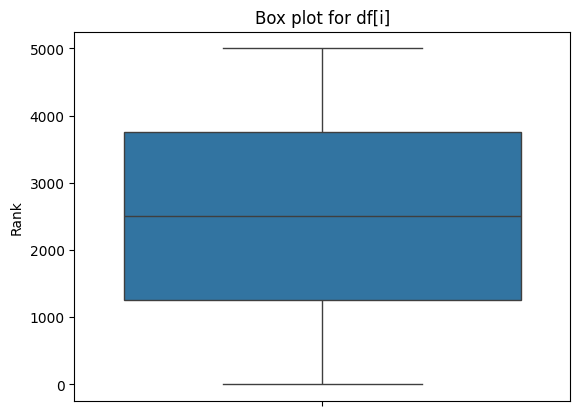

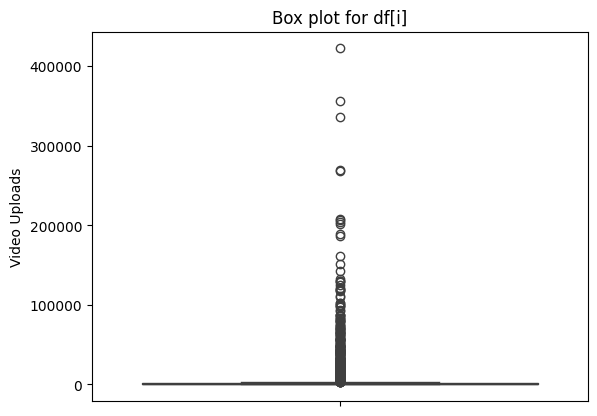

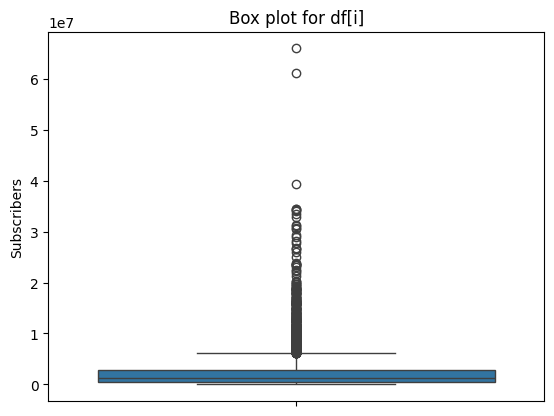

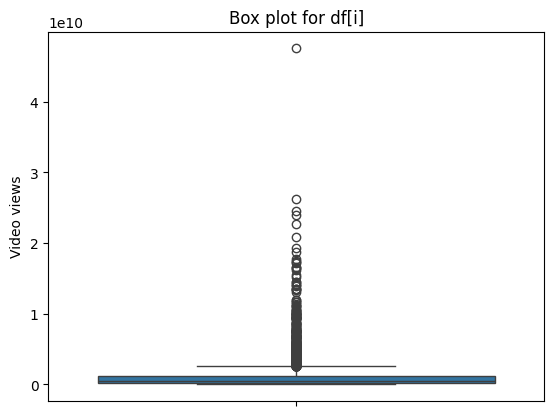

In [19]:
for i in df.describe().columns: #Creating box plot
    plt.title(f'Box plot for df[i]') #Title
    sns.boxplot(df[i]) #boxplot
    plt.show() 

In [20]:
numeric_columns = df.select_dtypes(include=[np.number]) #Selecting numeric columns

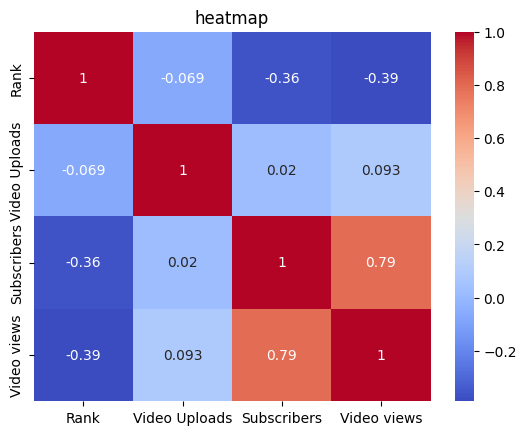

In [21]:
plt.title('heatmap')
sns.heatmap(numeric_columns.corr(),annot=True, cmap='coolwarm')
plt.show()

In [22]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views'],
      dtype='object')

In [23]:
df['Grade'].value_counts() #Grade Count

Grade
B+      2956
A-      1024
A        963
A+        41
A++       10
           6
Name: count, dtype: int64

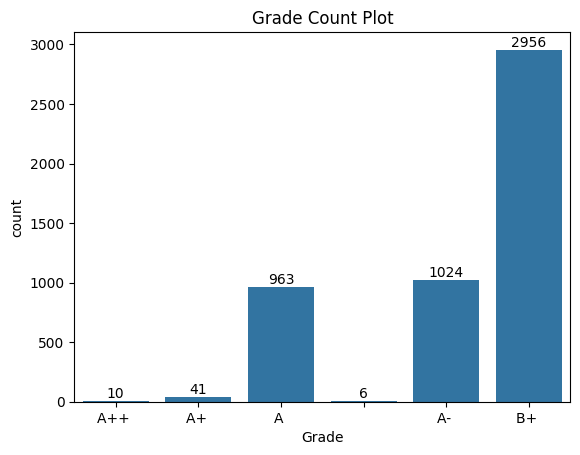

In [24]:
plt.title('Grade Count Plot')
ax = sns.countplot(data = df, x = 'Grade')
ax.bar_label(ax.containers[0])
plt.show()

### Count of Grade B+ is most

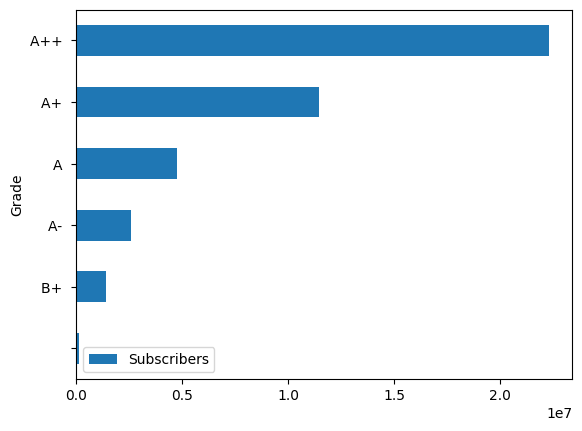

In [25]:
df.groupby('Grade')[['Subscribers']].mean().sort_values(by = 'Subscribers').plot(kind = 'barh')
plt.show()

### Subscriber of A++ is heghest

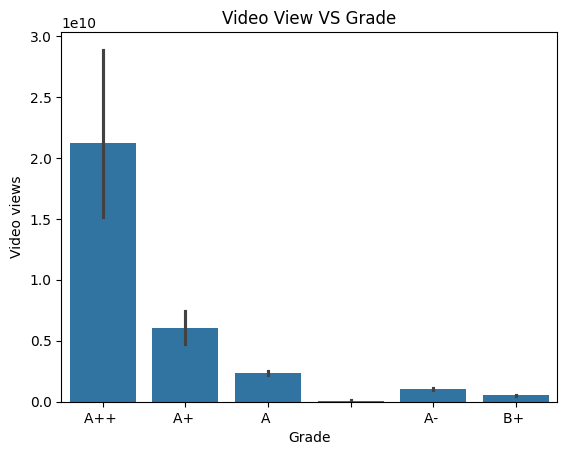

In [26]:
plt.title('Video View VS Grade')
sns.barplot(data = df, x = 'Grade',y= 'Video views')
plt.show()

### Grade wise A++ is having heshest Video View

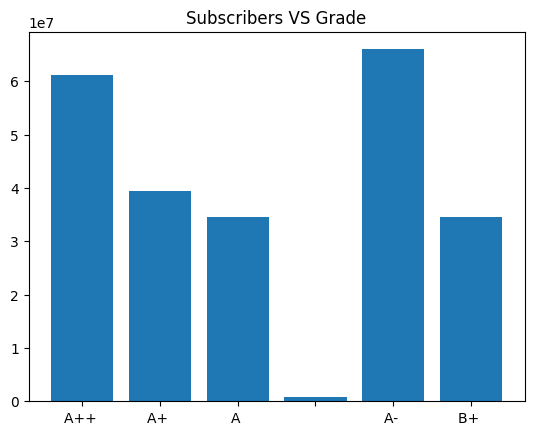

In [27]:
plt.title('Subscribers VS Grade')
plt.bar(df['Grade'], df['Subscribers'])
plt.show()

### Grade wise A- having highest Subscribers 

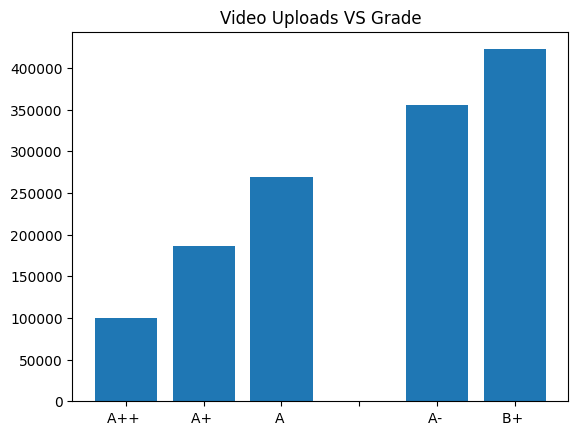

In [28]:
plt.title('Video Uploads VS Grade')
plt.bar(df['Grade'], df['Video Uploads'])
plt.show()

### Grade wise B+ having highest uploaded video